# ClusterTree
Unsupervised learning example: detect clusters in Fisher's iris dataset.

In [1]:
%autosave 0
%load_ext autoreload
%autoreload 2

from cluster import *
from tools import *

plot = Plot()

Autosave disabled


## normalize inputs

`ClusterTree` calculates distances between samples as if they were points in a vector space. Normalize columns to have similar scales to avoid accidentally ignoring "small" columns.

In [2]:
data = iris()
answer, *clues = data.columns
data[clues] = zscores(data[clues])
afew(data)

[150 rows x 5 columns]
                 dtype  nulls
species       category      0
sepal_length   float64      0
sepal_width    float64      0
petal_length   float64      0
petal_width    float64      0


,species,sepal_length,sepal_width,petal_length,petal_width
145,virginica,1.034539,-0.131539,0.816859,1.443994
146,virginica,0.551486,-1.278680,0.703564,0.919223
147,virginica,0.793012,-0.131539,0.816859,1.050416
148,virginica,0.430722,0.786174,0.930154,1.443994
149,virginica,0.068433,-0.131539,0.760211,0.788031


## build a ClusterTree
Input numerical columns only.
`ClusterTree` will calculate a SciPy *linkage matrix*.

In [3]:
tree = ClusterTree(data[clues])
afew(tree.links)

[149 rows x 4 columns]
            dtype  nulls
a           int64      0
b           int64      0
distance  float64      0
count       int64      0


,a,b,distance,count
144,283,291,0.248652,51
145,293,294,0.418069,74
146,288,292,0.529738,27
147,295,296,0.936590,101
148,290,297,1.636800,150


## choose clusters
Assign each flower a cluster number from 0 through N-1,
or input category labels to use Categorical clusters.

In [4]:
cluster = tree(3)
cluster.value_counts()

1    74
0    49
2    27
Name: cluster, dtype: int64

In [5]:
cluster = tree(3, cats=list('abc'))
cluster.value_counts()

b    74
a    49
c    27
Name: cluster, dtype: int64

## show confusion matrix
How closely do the clusters agree with the actual species?

species,setosa,versicolor,virginica
cluster,,,
a,49,0,0
b,0,25,49
c,1,25,1


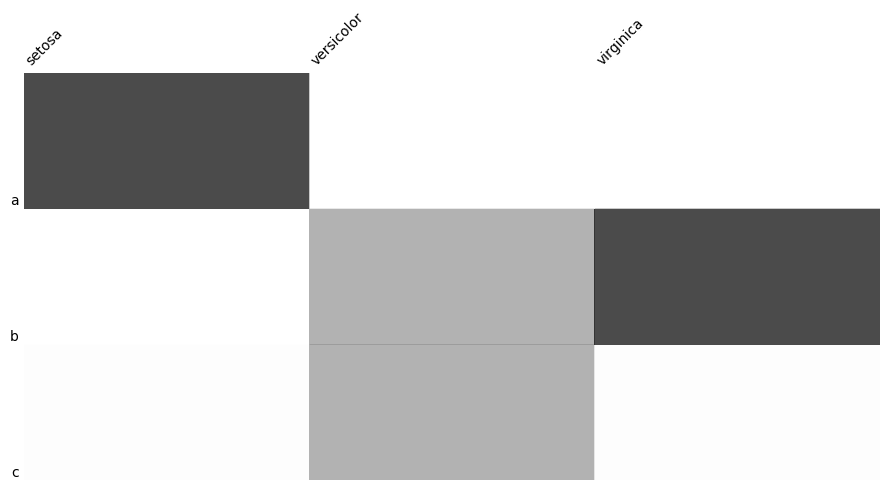

In [6]:
from pandas import crosstab

mat = crosstab(cluster, data['species'])
axes = plot.heat(mat, cmap='Greys')
mat

## plot a tree
Limit the number of branches for easier/faster viewing.

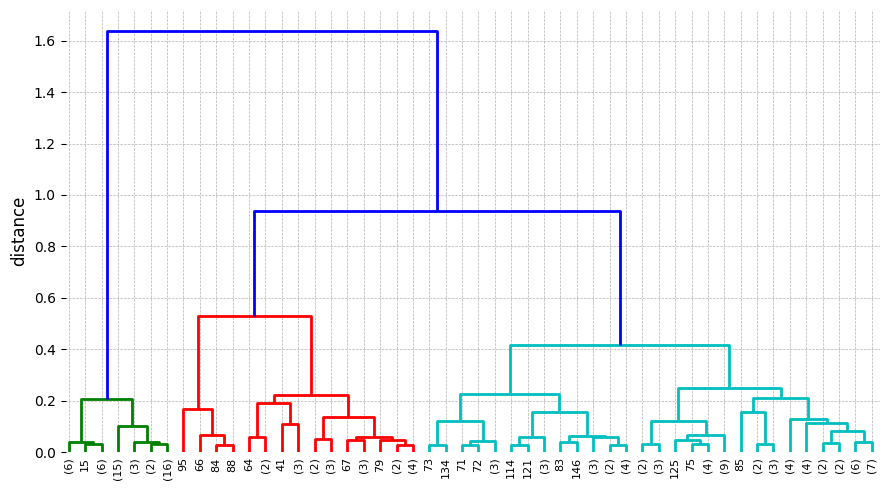

In [7]:
axes = plot.linkage(tree.links, 50, color_threshold=0.75)